### Markov Chain

In probability theory and statistics, a Markov chain or Markov process is a stochastic process describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. Informally, this may be thought of as, "What happens next depends only on the state of affairs now." A countably infinite sequence, in which the chain moves state at discrete time steps, gives a discrete-time Markov chain (DTMC). A continuous-time process is called a continuous-time Markov chain (CTMC). Markov processes are named in honor of the Russian mathematician Andrey Markov.

### How Markov Chains Work

- States: The possible conditions or situations the system can be in.
- Transitions: Movement from one state to another.
- Transition Probabilities: The likelihood (a number between 0 and 1) of moving from one state to another, often shown in a transition matrix.
- Memoryless Property: The future state only cares about the current state, making it simpler than tracking all past events. 

<!-- 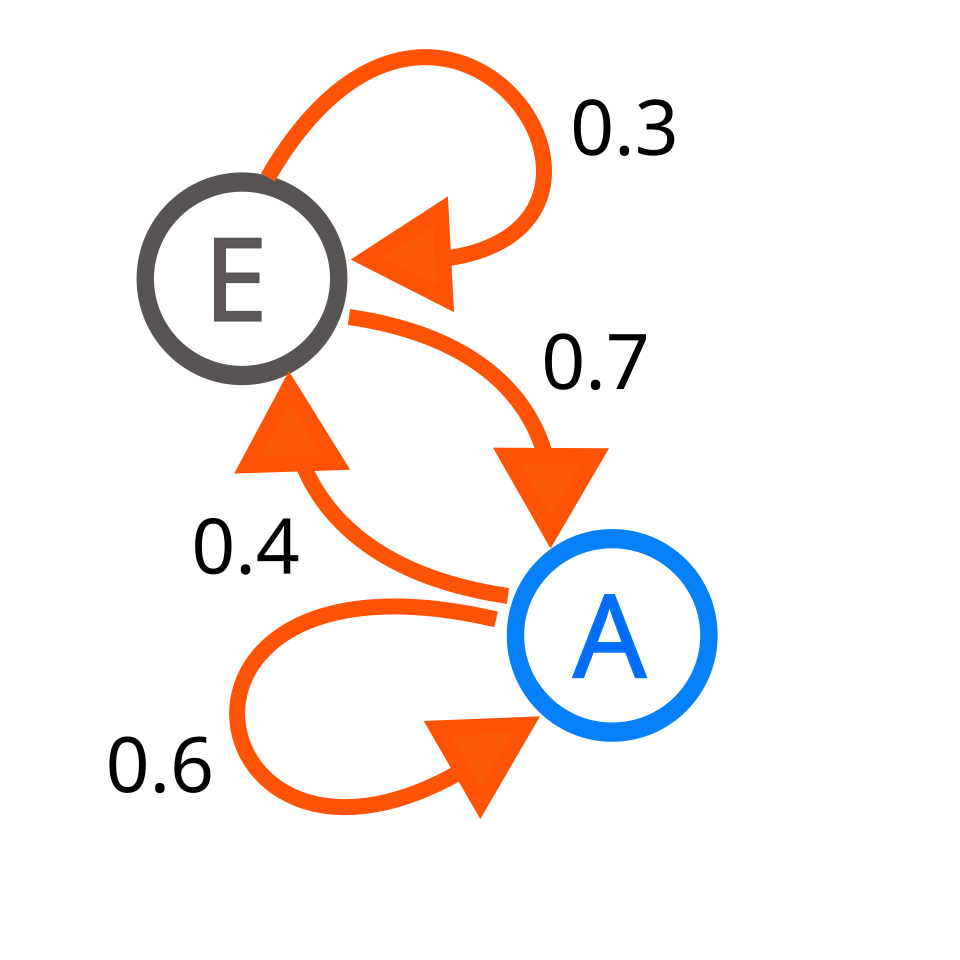 -->
<div>
<img src="Markovkate_01.svg.png" width="200" />
<p>A diagram representing a two-state Markov process. The numbers are the probability of changing from one state to another state."</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MarkovChain:
    """
    Discrete-time Markov Chain implementation
    """
    
    def __init__(self, states=None, transition_matrix=None):
        """
        Initialize Markov Chain
        
        Parameters:
        - states: list of state names
        - transition_matrix: numpy array of transition probabilities
        """
        self.states = states if states is not None else []
        self.n_states = len(self.states) if states else 0
        self.transition_matrix = transition_matrix
        self.state_to_index = {state: i for i, state in enumerate(self.states)}
        self.index_to_state = {i: state for i, state in enumerate(self.states)}
        
    def predict_next(self, current_state, n_steps=1):
        """
        Predict next state(s) given current state
        
        Parameters:
        - current_state: current state
        - n_steps: number of steps ahead to predict
        
        Returns:
        - probability distribution over states
        """
        if current_state not in self.state_to_index:
            raise ValueError(f"Unknown state: {current_state}")
        
        # Initial distribution (100% at current state)
        distribution = np.zeros(self.n_states)
        distribution[self.state_to_index[current_state]] = 1.0
        
        # Apply transition matrix n_steps times
        for _ in range(n_steps):
            distribution = np.matmul(distribution, self.transition_matrix)
        
        return {self.index_to_state[i]: prob for i, prob in enumerate(distribution)}
    
    def simulate(self, initial_state, n_steps, random_seed=None):
        """
        Simulate a random walk through the Markov chain
        
        Parameters:
        - initial_state: starting state
        - n_steps: number of steps to simulate
        - random_seed: optional random seed
        
        Returns:
        - sequence: list of states
        """
        if random_seed is not None:
            np.random.seed(random_seed)
        
        sequence = [initial_state]
        current_state = initial_state
        
        for _ in range(n_steps):
            current_idx = self.state_to_index[current_state]
            probabilities = self.transition_matrix[current_idx]
            next_idx = np.random.choice(self.n_states, p=probabilities)
            next_state = self.index_to_state[next_idx]
            sequence.append(next_state)
            current_state = next_state
        
        return sequence
    
    def stationary_distribution(self, tolerance=1e-10, max_iterations=10000):
        """
        Calculate stationary distribution (long-run probabilities)
        
        Returns:
        - dict: stationary distribution
        """
        # Start with uniform distribution
        distribution = np.ones(self.n_states) / self.n_states
        
        for _ in range(max_iterations):
            new_distribution = np.matmul(distribution, self.transition_matrix)
            
            # Check convergence
            if np.allclose(distribution, new_distribution, atol=tolerance):
                break
            
            distribution = new_distribution
        
        return {self.index_to_state[i]: prob for i, prob in enumerate(distribution)}


If market is currently in Bull regime:
  Next period Bull: 80.00%
  Next period Bear: 10.00%
  Next period Sideways: 10.00%

Long-term regime distribution:
  Bull: 50.00%
  Bear: 33.33%
  Sideways: 16.67%


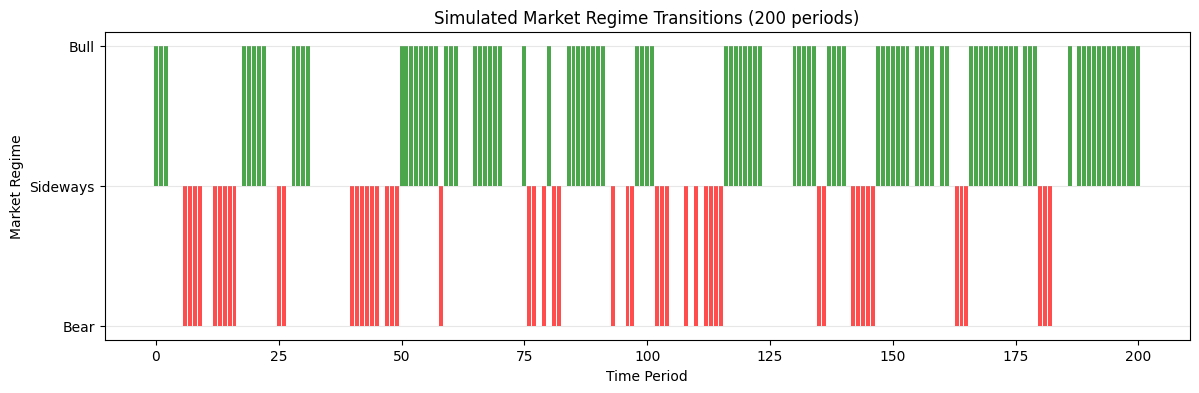

In [3]:
"""Stock market regime switching"""

states = ['Bull', 'Bear', 'Sideways']

# Historical regime transitions
transition_matrix = np.array([
    [0.8, 0.1, 0.1],   # From Bull
    [0.15, 0.7, 0.15], # From Bear
    [0.3, 0.3, 0.4]    # From Sideways
])

mc = MarkovChain(states, transition_matrix)

# Current regime analysis
print("\nIf market is currently in Bull regime:")
predictions = mc.predict_next('Bull', n_steps=1)
for state, prob in predictions.items():
    print(f"  Next period {state}: {prob:.2%}")
    
# Long-term regime probabilities
print("\nLong-term regime distribution:")
stationary = mc.stationary_distribution()
for state, prob in stationary.items():
    print(f"  {state}: {prob:.2%}")

# Simulate 100 periods
sequence = mc.simulate('Bull', n_steps=200, random_seed=49)

# Visualize regime changes
fig, ax = plt.subplots(figsize=(14, 4))

regime_map = {'Bull': 1, 'Sideways': 0, 'Bear': -1}
regime_values = [regime_map[s] for s in sequence]

colors = ['green' if r == 1 else 'red' if r == -1 else 'blue' for r in regime_values]
ax.bar(range(len(sequence)), regime_values, color=colors, alpha=0.7)
ax.set_xlabel('Time Period')
ax.set_ylabel('Market Regime')
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(['Bear', 'Sideways', 'Bull'])
ax.set_title('Simulated Market Regime Transitions (200 periods)')
ax.grid(True, alpha=0.3, axis='y')

plt.show()